In [1]:
from IPython.display import display
from sklearn.preprocessing import OrdinalEncoder

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
%matplotlib inline
sns.set(rc={'figure.figsize':(16,10)})

# EDA

## Изучаем соц/дем данные

In [3]:
socdem_data = pd.read_csv('../data/tinkoff_hackathon_data/avk_hackathon_data_party_x_socdem.csv')
display(socdem_data.head())
display(socdem_data.info())

party_rk gender_cd   age marital_status_desc  children_cnt  region_flg
0     61243         F  70.0                 NaN             0           0
1     66535         F  25.0                 NaN             0           0
2     83721         M  55.0       Женат/замужем             0           0
3     88238         F  35.0                 NaN             0           0
4     57179         F  30.0       Женат/замужем             0           0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   party_rk             50000 non-null  int64  
 1   gender_cd            49989 non-null  object 
 2   age                  50000 non-null  float64
 3   marital_status_desc  37594 non-null  object 
 4   children_cnt         50000 non-null  int64  
 5   region_flg           50000 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 2.3+ MB


None

### Убираем NaN

In [4]:
socdem_data.dropna(inplace=True)
socdem_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37588 entries, 2 to 49998
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   party_rk             37588 non-null  int64  
 1   gender_cd            37588 non-null  object 
 2   age                  37588 non-null  float64
 3   marital_status_desc  37588 non-null  object 
 4   children_cnt         37588 non-null  int64  
 5   region_flg           37588 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 2.0+ MB


In [5]:
socdem_data.describe()

party_rk           age  children_cnt    region_flg
count  37588.000000  37588.000000  37588.000000  37588.000000
mean   45241.900048     39.466984      0.333404      0.070368
std    27470.514811     11.334806      0.777846      0.255770
min        1.000000     20.000000      0.000000      0.000000
25%    21278.000000     30.000000      0.000000      0.000000
50%    44212.500000     35.000000      0.000000      0.000000
75%    68691.750000     45.000000      0.000000      0.000000
max    94610.000000     90.000000      4.000000      1.000000

In [6]:
socdem_data

party_rk gender_cd   age marital_status_desc  children_cnt  region_flg
2         83721         M  55.0       Женат/замужем             0           0
4         57179         F  30.0       Женат/замужем             0           0
5         66793         M  40.0       Женат/замужем             0           0
7         24352         M  35.0       Женат/замужем             1           0
9         82426         F  50.0       Вдовец, вдова             0           1
...         ...       ...   ...                 ...           ...         ...
49994     43701         M  25.0   Холост/не замужем             0           0
49995     54994         M  40.0       Женат/замужем             0           0
49996     63391         M  35.0   Холост/не замужем             0           0
49997      5418         F  55.0   Холост/не замужем             0           0
49998     50273         F  35.0       Женат/замужем             0           0

[37588 rows x 6 columns]

### Визуализация распределений значений

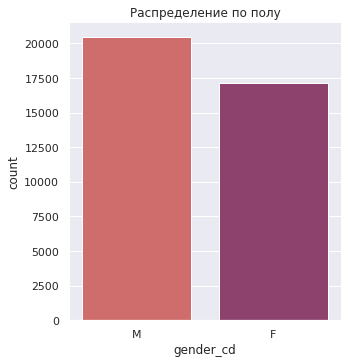

In [7]:
sns.catplot(x='gender_cd', kind='count', data=socdem_data, palette='flare').set(title='Распределение по полу');

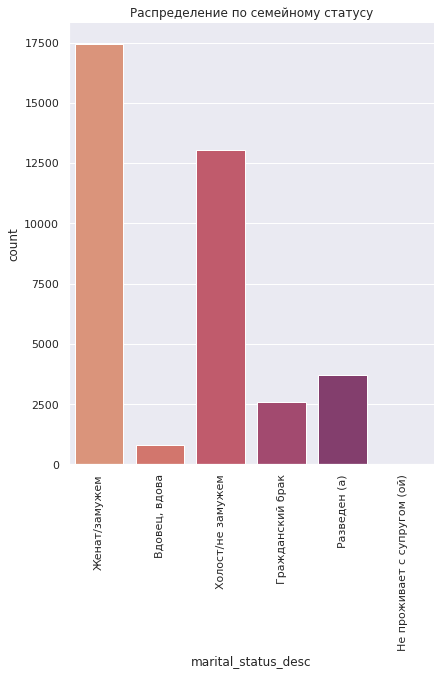

In [8]:
sns.catplot(x='marital_status_desc', kind='count', data=socdem_data, palette='flare',
                                    height=7).set(title='Распределение по семейному статусу').set_xticklabels(rotation=90);

Видно, что "не проживает с супругой/супругом" почти нет

### Обрабатываем бинарные признаки
Pandas делает слишком разреженную матрциу, воспользуемся sklearn 

In [9]:
ord_encoder = OrdinalEncoder(dtype=np.int16)
encoded_data = ord_encoder.fit_transform(socdem_data[['gender_cd', 'marital_status_desc']])
socdem_data[['gender_cd', 'marital_status_desc']] = encoded_data
socdem_data

party_rk  gender_cd   age  marital_status_desc  children_cnt  \
2         83721          1  55.0                    2             0   
4         57179          0  30.0                    2             0   
5         66793          1  40.0                    2             0   
7         24352          1  35.0                    2             1   
9         82426          0  50.0                    0             0   
...         ...        ...   ...                  ...           ...   
49994     43701          1  25.0                    5             0   
49995     54994          1  40.0                    2             0   
49996     63391          1  35.0                    5             0   
49997      5418          0  55.0                    5             0   
49998     50273          0  35.0                    2             0   

       region_flg  
2               0  
4               0  
5               0  
7               0  
9               1  
...           ...  
49994           0  
49995           0  
49996           0  
49997           0  
49998           0  

[37588 rows x 6 columns]

Проверим количество каждого значения в категории ```marital_status_desc```

In [10]:
socdem_data.marital_status_desc.value_counts()

2    17444
5    13043
4     3695
1     2606
0      798
3        2
Name: marital_status_desc, dtype: int64

Ну да, 2 человека, дропаем

TODO: Посмотреть, можно ли собрать в 2 значения

In [11]:
indexes_to_drop = socdem_data.loc[socdem_data.marital_status_desc == 3].index
socdem_data.drop(index=indexes_to_drop, inplace=True)
# Обновляем данные
socdem_data[['marital_status_desc']] = ord_encoder.fit_transform(socdem_data[['marital_status_desc']])
socdem_data

party_rk  gender_cd   age  marital_status_desc  children_cnt  \
2         83721          1  55.0                    2             0   
4         57179          0  30.0                    2             0   
5         66793          1  40.0                    2             0   
7         24352          1  35.0                    2             1   
9         82426          0  50.0                    0             0   
...         ...        ...   ...                  ...           ...   
49994     43701          1  25.0                    4             0   
49995     54994          1  40.0                    2             0   
49996     63391          1  35.0                    4             0   
49997      5418          0  55.0                    4             0   
49998     50273          0  35.0                    2             0   

       region_flg  
2               0  
4               0  
5               0  
7               0  
9               1  
...           ...  
49994           0  
49995           0  
49996           0  
49997           0  
49998           0  

[37586 rows x 6 columns]

## Добавим к таблице список используемых клиентом продуктов банка

In [12]:
products_data = pd.read_csv('../data/tinkoff_hackathon_data/avk_hackathon_data_party_products.csv')
products_data

party_rk  product1  product2  product3  product4  product5  product6  \
0         74874         1         1         0         0         0         0   
1         83618         0         0         1         1         1         0   
2         73766         0         0         0         1         1         0   
3         60218         0         1         0         0         0         0   
4         47253         0         0         0         1         1         0   
...         ...       ...       ...       ...       ...       ...       ...   
49995     52276         0         1         0         0         1         0   
49996     53681         0         1         0         0         0         0   
49997     13947         0         1         0         1         1         0   
49998     94411         0         1         0         0         0         0   
49999     56746         0         0         0         1         1         0   

       product7  
0             0  
1             0  
2             0  
3             0  
4             0  
...         ...  
49995         0  
49996         0  
49997         1  
49998         0  
49999         0  

[50000 rows x 8 columns]

In [13]:
# Можно из разреженной перевести в один столбец
final_data = pd.merge(left=socdem_data, right=products_data, how='inner', on='party_rk')
final_data

party_rk  gender_cd   age  marital_status_desc  children_cnt  \
0         83721          1  55.0                    2             0   
1         57179          0  30.0                    2             0   
2         66793          1  40.0                    2             0   
3         24352          1  35.0                    2             1   
4         82426          0  50.0                    0             0   
...         ...        ...   ...                  ...           ...   
37581     43701          1  25.0                    4             0   
37582     54994          1  40.0                    2             0   
37583     63391          1  35.0                    4             0   
37584      5418          0  55.0                    4             0   
37585     50273          0  35.0                    2             0   

       region_flg  product1  product2  product3  product4  product5  product6  \
0               0         1         0         1         1         1         0   
1               0         1         1         0         0         1         0   
2               0         0         1         0         0         1         0   
3               0         0         1         1         1         1         0   
4               1         1         1         0         1         0         0   
...           ...       ...       ...       ...       ...       ...       ...   
37581           0         0         1         0         1         1         0   
37582           0         0         1         0         0         0         0   
37583           0         1         1         0         0         1         0   
37584           0         1         1         0         0         0         0   
37585           0         1         0         0         1         0         0   

       product7  
0             0  
1             0  
2             0  
3             0  
4             1  
...         ...  
37581         1  
37582         1  
37583         0  
37584         0  
37585         1  

[37586 rows x 13 columns]

## Добавляем разницу в балансе за год

In [14]:
balance_diff_data = pd.read_csv('../data/tinkoff_hackathon_data/avk_hackathon_data_account_x_balance.csv').dropna()
balance_diff_data

party_rk  account_rk  prev_month   cur_month  balance_chng
0          51607       55309  2018-12-31  2019-01-31       15000.0
1          59074       70471  2018-12-31  2019-01-31           0.0
2          33941       33065  2018-12-31  2019-01-31      -15000.0
3           9336        8611  2018-12-31  2019-01-31      -50000.0
4          13958        8421  2018-12-31  2019-01-31      -20000.0
...          ...         ...         ...         ...           ...
614418     61783      105951  2019-11-30  2019-12-31      -25000.0
614419     73974       91118  2019-11-30  2019-12-31      -20000.0
614420     34789      107927  2019-11-30  2019-12-31           0.0
614421     15325       52525  2019-11-30  2019-12-31           0.0
614422     49302       52127  2019-11-30  2019-12-31           0.0

[612832 rows x 5 columns]

Так можно посмотреть по месяцам

In [15]:
balance_diff_data[['party_rk', 'cur_month', 'balance_chng']].groupby(['party_rk', 'cur_month']).sum()

balance_chng
party_rk cur_month               
1        2019-01-31        5000.0
         2019-02-28        5000.0
         2019-03-31      -10000.0
         2019-04-30        5000.0
         2019-05-31           0.0
...                           ...
94608    2019-10-31           0.0
         2019-11-30           0.0
         2019-12-31           0.0
94610    2019-11-30           0.0
         2019-12-31      -30000.0

[492803 rows x 1 columns]

Так по году в целом

In [16]:
balance_diff_grouped_data = balance_diff_data[['party_rk', 'balance_chng']].groupby(['party_rk']).sum()
balance_diff_grouped_data

balance_chng
party_rk              
1              85000.0
5            -145000.0
7              25000.0
8              95000.0
9                  0.0
...                ...
94603          -5000.0
94606          40000.0
94607        -110000.0
94608         -50000.0
94610         -30000.0

[49513 rows x 1 columns]

Присоединяем к результирующему фрейму

In [17]:
final_data = pd.merge(left=final_data, right=balance_diff_grouped_data, how='inner', on='party_rk')
final_data

party_rk  gender_cd   age  marital_status_desc  children_cnt  \
0         83721          1  55.0                    2             0   
1         57179          0  30.0                    2             0   
2         66793          1  40.0                    2             0   
3         24352          1  35.0                    2             1   
4         82426          0  50.0                    0             0   
...         ...        ...   ...                  ...           ...   
37231     43701          1  25.0                    4             0   
37232     54994          1  40.0                    2             0   
37233     63391          1  35.0                    4             0   
37234      5418          0  55.0                    4             0   
37235     50273          0  35.0                    2             0   

       region_flg  product1  product2  product3  product4  product5  product6  \
0               0         1         0         1         1         1         0   
1               0         1         1         0         0         1         0   
2               0         0         1         0         0         1         0   
3               0         0         1         1         1         1         0   
4               1         1         1         0         1         0         0   
...           ...       ...       ...       ...       ...       ...       ...   
37231           0         0         1         0         1         1         0   
37232           0         0         1         0         0         0         0   
37233           0         1         1         0         0         1         0   
37234           0         1         1         0         0         0         0   
37235           0         1         0         0         1         0         0   

       product7  balance_chng  
0             0      -80000.0  
1             0      -20000.0  
2             0      -10000.0  
3             0      100000.0  
4             1      -25000.0  
...         ...           ...  
37231         1      -95000.0  
37232         1      -45000.0  
37233         0      -25000.0  
37234         0        5000.0  
37235         1           0.0  

[37236 rows x 14 columns]

In [18]:
final_data.corr()

party_rk  gender_cd       age  marital_status_desc  \
party_rk             1.000000   0.004934 -0.242715             0.083388   
gender_cd            0.004934   1.000000 -0.056571             0.070983   
age                 -0.242715  -0.056571  1.000000            -0.320954   
marital_status_desc  0.083388   0.070983 -0.320954             1.000000   
children_cnt        -0.332896  -0.028793  0.168868            -0.151939   
region_flg          -0.054537   0.011495 -0.000792             0.027248   
product1             0.063825   0.026681 -0.028628             0.025196   
product2            -0.249349  -0.052904  0.151156            -0.078781   
product3             0.047695   0.094468 -0.117112             0.054740   
product4             0.047106   0.093525 -0.167594             0.087101   
product5             0.008029   0.002892 -0.003017            -0.003193   
product6            -0.034496   0.000812 -0.007380             0.019123   
product7            -0.059697   0.023792 -0.014887            -0.009437   
balance_chng        -0.013390   0.002161 -0.015076             0.009540   

                     children_cnt  region_flg  product1  product2  product3  \
party_rk                -0.332896   -0.054537  0.063825 -0.249349  0.047695   
gender_cd               -0.028793    0.011495  0.026681 -0.052904  0.094468   
age                      0.168868   -0.000792 -0.028628  0.151156 -0.117112   
marital_status_desc     -0.151939    0.027248  0.025196 -0.078781  0.054740   
children_cnt             1.000000    0.003090 -0.031587  0.092847 -0.062661   
region_flg               0.003090    1.000000  0.015886 -0.003841  0.012591   
product1                -0.031587    0.015886  1.000000 -0.022410  0.122004   
product2                 0.092847   -0.003841 -0.022410  1.000000 -0.203916   
product3                -0.062661    0.012591  0.122004 -0.203916  1.000000   
product4                -0.069869    0.038464  0.121718 -0.500474  0.340754   
product5                -0.003046    0.004197  0.012824  0.003953 -0.002258   
product6                 0.001852    0.033561  0.024507 -0.118580  0.102376   
product7                 0.010487    0.002937  0.013057  0.087089  0.010878   
balance_chng             0.006008    0.009922  0.003045 -0.020110  0.010313   

                     product4  product5  product6  product7  balance_chng  
party_rk             0.047106  0.008029 -0.034496 -0.059697     -0.013390  
gender_cd            0.093525  0.002892  0.000812  0.023792      0.002161  
age                 -0.167594 -0.003017 -0.007380 -0.014887     -0.015076  
marital_status_desc  0.087101 -0.003193  0.019123 -0.009437      0.009540  
children_cnt        -0.069869 -0.003046  0.001852  0.010487      0.006008  
region_flg           0.038464  0.004197  0.033561  0.002937      0.009922  
product1             0.121718  0.012824  0.024507  0.013057      0.003045  
product2            -0.500474  0.003953 -0.118580  0.087089     -0.020110  
product3             0.340754 -0.002258  0.102376  0.010878      0.010313  
product4             1.000000  0.004683  0.143568  0.126834      0.009233  
product5             0.004683  1.000000 -0.002051  0.004262      0.006886  
product6             0.143568 -0.002051  1.000000 -0.032404     -0.003506  
product7             0.126834  0.004262 -0.032404  1.000000     -0.022365  
balance_chng         0.009233  0.006886 -0.003506 -0.022365      1.000000

In [19]:
transaction_data = pd.read_csv('../data/tinkoff_hackathon_data/avk_hackathon_data_train_transactions.csv').dropna()
transaction_data

party_rk  account_rk  financial_account_type_cd transaction_dttm  \
1            63404       72991                          1       2019-01-01   
3            57970       64838                          2       2019-01-01   
4            12232       11591                          2       2019-01-01   
5            51074       54639                          2       2019-01-01   
6             1534        5610                          2       2019-01-01   
...            ...         ...                        ...              ...   
11987609     53765      109370                          1       2019-12-31   
11987612     44990      111641                          1       2019-12-31   
11987614     78716       99133                          1       2019-12-31   
11987615     73104       91039                          2       2019-12-31   
11987616     42916      125082                          1       2019-12-31   

         transaction_type_desc  transaction_amt_rur  merchant_rk  \
1                      Покупка               410.00     887248.0   
3                      Покупка              6203.70     363834.0   
4                      Покупка               734.53      85919.0   
5                      Покупка               366.60     146084.0   
6                      Покупка               101.85     166649.0   
...                        ...                  ...          ...   
11987609               Покупка              3065.00     954580.0   
11987612               Покупка               121.00    1940970.0   
11987614               Покупка               175.00    2688766.0   
11987615               Покупка               185.99    1965313.0   
11987616               Покупка               431.00    2007688.0   

          merchant_type  merchant_group_rk      category  
1                 330.0              725.0      Фаст Фуд  
3                 278.0              454.0    Дом/Ремонт  
4                 286.0              878.0  Супермаркеты  
5                 286.0              878.0  Супермаркеты  
6                 286.0              341.0  Супермаркеты  
...                 ...                ...           ...  
11987609          313.0              261.0  Одежда/Обувь  
11987612          330.0              675.0      Фаст Фуд  
11987614          229.0              901.0     Транспорт  
11987615          286.0              878.0  Супермаркеты  
11987616          330.0              675.0      Фаст Фуд  

[5270970 rows x 10 columns]

In [20]:
transaction_data[['party_rk', 'transaction_dttm', 'category', 'transaction_amt_rur']].groupby(['party_rk', 'transaction_dttm', 'category']).sum()

transaction_amt_rur
party_rk transaction_dttm category                         
1        2019-02-08       Супермаркеты              3159.56
         2019-02-09       Одежда/Обувь              2955.00
                          Супермаркеты              1760.59
         2019-02-10       Супермаркеты              1399.90
         2019-02-13       Супермаркеты               711.20
...                                                     ...
94610    2019-10-16       Супермаркеты               271.95
         2019-10-17       Супермаркеты               119.86
         2019-10-18       Супермаркеты                47.90
         2019-12-07       Супермаркеты              1044.62
         2019-12-20       Супермаркеты               434.47

[3827893 rows x 1 columns]

In [21]:
final_data

party_rk  gender_cd   age  marital_status_desc  children_cnt  \
0         83721          1  55.0                    2             0   
1         57179          0  30.0                    2             0   
2         66793          1  40.0                    2             0   
3         24352          1  35.0                    2             1   
4         82426          0  50.0                    0             0   
...         ...        ...   ...                  ...           ...   
37231     43701          1  25.0                    4             0   
37232     54994          1  40.0                    2             0   
37233     63391          1  35.0                    4             0   
37234      5418          0  55.0                    4             0   
37235     50273          0  35.0                    2             0   

       region_flg  product1  product2  product3  product4  product5  product6  \
0               0         1         0         1         1         1         0   
1               0         1         1         0         0         1         0   
2               0         0         1         0         0         1         0   
3               0         0         1         1         1         1         0   
4               1         1         1         0         1         0         0   
...           ...       ...       ...       ...       ...       ...       ...   
37231           0         0         1         0         1         1         0   
37232           0         0         1         0         0         0         0   
37233           0         1         1         0         0         1         0   
37234           0         1         1         0         0         0         0   
37235           0         1         0         0         1         0         0   

       product7  balance_chng  
0             0      -80000.0  
1             0      -20000.0  
2             0      -10000.0  
3             0      100000.0  
4             1      -25000.0  
...         ...           ...  
37231         1      -95000.0  
37232         1      -45000.0  
37233         0      -25000.0  
37234         0        5000.0  
37235         1           0.0  

[37236 rows x 14 columns]

In [24]:
transaction_train_data = pd.read_csv('../data/tinkoff_hackathon_data/avk_hackathon_data_train_transactions.csv')
transaction_train_data

party_rk  account_rk  financial_account_type_cd transaction_dttm  \
0            20337       19666                          1       2019-01-01   
1            63404       72991                          1       2019-01-01   
2            24789       23517                          2       2019-01-01   
3            57970       64838                          2       2019-01-01   
4            12232       11591                          2       2019-01-01   
...            ...         ...                        ...              ...   
11987612     44990      111641                          1       2019-12-31   
11987613     53023       57593                          2       2019-12-31   
11987614     78716       99133                          1       2019-12-31   
11987615     73104       91039                          2       2019-12-31   
11987616     42916      125082                          1       2019-12-31   

         transaction_type_desc  transaction_amt_rur  merchant_rk  \
0                      Покупка                84.00      88676.0   
1                      Покупка               410.00     887248.0   
2                      Покупка               701.44     830014.0   
3                      Покупка              6203.70     363834.0   
4                      Покупка               734.53      85919.0   
...                        ...                  ...          ...   
11987612               Покупка               121.00    1940970.0   
11987613               Покупка               102.29    1198564.0   
11987614               Покупка               175.00    2688766.0   
11987615               Покупка               185.99    1965313.0   
11987616               Покупка               431.00    2007688.0   

          merchant_type  merchant_group_rk      category  
0                 348.0                NaN      Сувениры  
1                 330.0              725.0      Фаст Фуд  
2                 291.0                NaN  Супермаркеты  
3                 278.0              454.0    Дом/Ремонт  
4                 286.0              878.0  Супермаркеты  
...                 ...                ...           ...  
11987612          330.0              675.0      Фаст Фуд  
11987613          286.0                NaN  Супермаркеты  
11987614          229.0              901.0     Транспорт  
11987615          286.0              878.0  Супермаркеты  
11987616          330.0              675.0      Фаст Фуд  

[11987617 rows x 10 columns]

In [79]:
user_categories_jan = pd.read_csv('../data/tinkoff/users_categories_amount_jan_2019.csv')
user_categories_feb = pd.read_csv('../data/tinkoff/users_categories_amount_feb_2019.csv')

In [73]:
user_categories_jan.groupby(by=['party_rk', 'category']).sum().unstack(level=-1)

transaction_amt_rur                                            \
category           Duty Free Авиабилеты Автоуслуги  Аптеки Аренда авто   
party_rk                                                                 
5                        NaN        NaN        NaN     NaN         NaN   
7                        NaN        NaN        NaN  1843.8         NaN   
8                        NaN        NaN        NaN     NaN         NaN   
13                       NaN        NaN        NaN     NaN         NaN   
20                       NaN        NaN        NaN     NaN         NaN   
...                      ...        ...        ...     ...         ...   
94602                    NaN        NaN        NaN     NaN         NaN   
94603                    NaN        NaN        NaN     NaN         NaN   
94606                    NaN        NaN     2047.0  2536.9         NaN   
94607                    NaN        NaN        NaN     NaN         NaN   
94608                    NaN        NaN        NaN     NaN         NaN   

                                                            ...              \
category Госсборы Дом/Ремонт Ж/д билеты Животные Искусство  ... Спорттовары   
party_rk                                                    ...               
5             NaN    8075.60        NaN      NaN       NaN  ...         NaN   
7             NaN        NaN        NaN      NaN       NaN  ...         NaN   
8             NaN        NaN        NaN      NaN       NaN  ...         NaN   
13            NaN        NaN        NaN      NaN       NaN  ...         NaN   
20            NaN   38596.85        NaN      NaN     440.0  ...         NaN   
...           ...        ...        ...      ...       ...  ...         ...   
94602         NaN     368.00        NaN      NaN       NaN  ...         NaN   
94603         NaN        NaN        NaN      NaN       NaN  ...         NaN   
94606         NaN    2642.00        NaN      NaN       NaN  ...         NaN   
94607         NaN    3690.00        NaN      NaN       NaN  ...         NaN   
94608         NaN        NaN        NaN      NaN       NaN  ...         NaN   

                                                                         \
category Сувениры Супермаркеты  Топливо Транспорт Турагентства Фаст Фуд   
party_rk                                                                  
5             NaN     18376.19      NaN       NaN          NaN  3016.00   
7             NaN          NaN  1791.53       NaN          NaN      NaN   
8             NaN          NaN      NaN       NaN          NaN      NaN   
13            NaN       932.22      NaN     155.0          NaN      NaN   
20            NaN      1421.90      NaN       NaN          NaN      NaN   
...           ...          ...      ...       ...          ...      ...   
94602         NaN      1298.00      NaN       NaN          NaN      NaN   
94603         NaN       711.49      NaN     300.0          NaN   111.00   
94606         NaN      2619.70      NaN       NaN          NaN   336.92   
94607         NaN          NaN      NaN       NaN          NaN      NaN   
94608         NaN       776.47      NaN       NaN          NaN      NaN   

                                          
category Фото/Видео Цветы Частные услуги  
party_rk                                  
5               NaN   NaN            NaN  
7               NaN   NaN            NaN  
8               NaN   NaN            NaN  
13              NaN   NaN            NaN  
20              NaN   NaN            NaN  
...             ...   ...            ...  
94602           NaN   NaN            NaN  
94603           NaN   NaN            NaN  
94606           NaN   NaN            NaN  
94607           NaN   NaN            NaN  
94608           NaN   NaN            NaN  

[25100 rows x 34 columns]

In [83]:
result_df_jan = pd.merge(left=final_data, right=user_categories_jan.groupby(by=['party_rk', 'category']).sum().unstack(level=-1), on='party_rk')
result_df_jan.fillna(0).to_csv('data_jan.csv', sep=',')

/tmp/ipykernel_43108/920276374.py:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  result_df_jan = pd.merge(left=final_data, right=user_categories_jan.groupby(by=['party_rk', 'category']).sum().unstack(level=-1), on='party_rk')


In [80]:
result_feb_df = pd.merge(left=final_data, right=user_categories_feb.groupby(by=['party_rk', 'category']).sum().unstack(level=-1), on='party_rk')
result_feb_df.fillna(0).to_csv('data_feb.csv', sep=',')


/tmp/ipykernel_43108/2648717923.py:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  result_feb_df = pd.merge(left=final_data, right=user_categories_feb.groupby(by=['party_rk', 'category']).sum().unstack(level=-1), on='party_rk')
